Importing datasets and exploring it.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
print("shape of the dataset",data.shape)

shape of the dataset (918, 12)


Information about the data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [ ]:
print("Describing our dataset ")
data.describe()

Describing our dataset 


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Exploratory Data anaylsis part:

In [ ]:
len_heart0 = len(data["HeartDisease"][data.HeartDisease==0])
len_heart1 = len(data["HeartDisease"][data.HeartDisease==1])

print("Cases with heart diseases: ", len_heart1)
print("Cases with no heart diseases: ", len_heart0)

#Now further analysis

len_abv50_heart1 = len(data["HeartDisease"][data.Age>=50][data.HeartDisease==1])
len_abv50_heart0 = len(data["HeartDisease"][data.Age<50][data.HeartDisease==0])

print("Cases with age 50 and above with heart diseases: ", len_abv50_heart1)
print("Cases with age 50 and baove no heart diseases: ", len_abv50_heart0)

#imbalance data
#issues- if more trained on cases with age 50 and above with heart disease then 
#output will be 1
#model may become biased


Cases with heart diseases:  508
Cases with no heart diseases:  410
Cases with age 50 and above with heart diseases:  397
Cases with age 50 and baove no heart diseases:  180


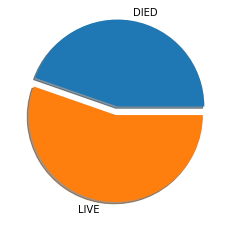

In [ ]:
arr = np.array([len_heart0, len_heart1])
labels = {"LIVE", "DIED"}
plt.pie(arr,labels=labels,explode = [0.1,0.0],shadow = True)
plt.show()

Seeing distribution of Age

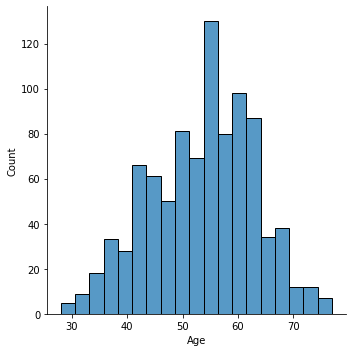

In [ ]:
sns.displot(data["Age"])
plt.show()
#Most of the cases around age55

([<matplotlib.patches.Wedge at 0x7f03c6d89b50>,
 [Text(0.6683809875263266, 0.9966277416936238, 'Live above age50'),
  Text(-0.6126826574342348, -0.9135753725223357, 'Died above age50')])

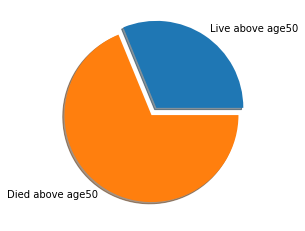

In [ ]:
arr1 = np.array([len_abv50_heart0,len_abv50_heart1])
labels = {"Live above age50", "Died above age50"}
plt.pie(arr1,labels=labels, explode = [0.1,0.0], shadow = True)

#Most of the cases people died above age50

Seeing distribution of Cholestrol

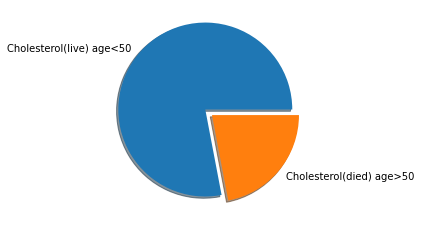

Cholesterol(died) age>50 234
Cholesterol(live) age>50 66


In [ ]:
#How many people with cholesterol died above age 50?

died_cholesterol_abv50 = len(data["HeartDisease"][data.Age>=50][data.Cholesterol >=200][data.HeartDisease==1])
live_cholesterol_abv50 = len(data["HeartDisease"][data.Age>=50][data.Cholesterol <200][data.HeartDisease==0])

arr2 = ([died_cholesterol_abv50, live_cholesterol_abv50])
labels = {"Cholesterol(died) age>50", "Cholesterol(live) age<50"}

plt.pie(arr2, labels=labels, explode=[.1,0.0], shadow = True)
plt.show()

print("Cholesterol(died) age>50",died_cholesterol_abv50)
print("Cholesterol(live) age>50",live_cholesterol_abv50)

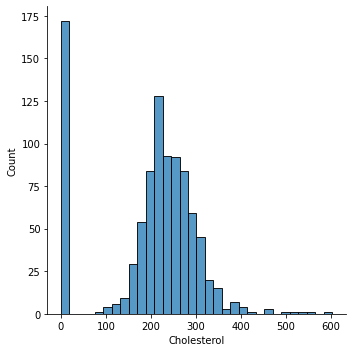

In [ ]:
sns.displot(data["Cholesterol"])
plt.show()

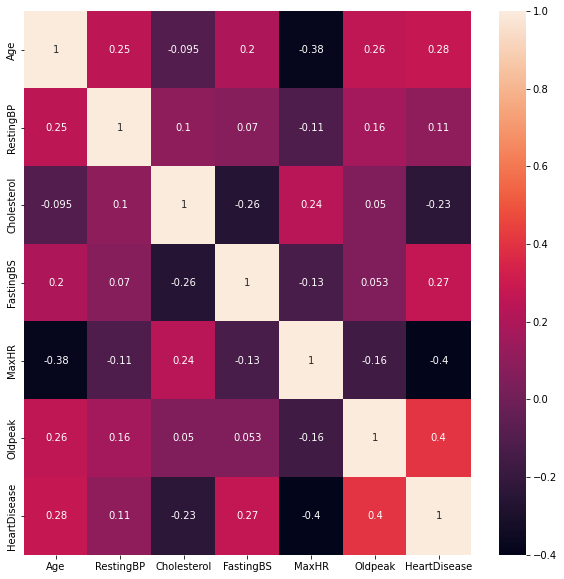

In [ ]:
#checking for correlation of our data

corr = data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot = True)

Model in making

Dataset development-

In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop(["HeartDisease","Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"],axis=1)
y=data["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print("Shape of X_test: ", X_test.shape)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_test: ", y_test.shape)
print("Shape of y_train: ", y_train.shape)

Shape of X_test:  (184, 6)
Shape of X_train:  (734, 6)
Shape of y_test:  (184,)
Shape of y_train:  (734,)


Model building

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluating_model(y_test,y_pred):
  print("Accuracy score: ", accuracy_score(y_test,y_pred))
  print("Confusion matrix: ", confusion_matrix(y_test,y_pred))
  print("Precision_score: ", precision_score(y_test,y_pred))
  print("Recall score: ", recall_score(y_test,y_pred))

In [ ]:
#Logistic regression for baseline model

from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train,y_train)


y_pred = lr_clf.predict(X_test)
evaluating_model(y_test,y_pred)


Accuracy score:  0.75
Confusion matrix:  [[59 18]
 [28 79]]
Precision_score:  0.8144329896907216
Recall score:  0.7383177570093458


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip = make_pipeline(StandardScaler(),LogisticRegression())
lr_clf_pip.fit(X_train,y_train)
y_pred1 = lr_clf_pip.predict(X_test)
evaluating_model(y_test, y_pred1)

Accuracy score:  0.75
Confusion matrix:  [[59 18]
 [28 79]]
Precision_score:  0.8144329896907216
Recall score:  0.7383177570093458


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,.001,.0001],
              'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.544 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.544 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.544 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.544 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.544 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.544 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

Best parameter model found after taking all combinations

In [ ]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [ ]:
svc = SVC(C=1000, gamma = 0.0001)
svc.fit(X_train,y_train)
y_pred3 = svc.predict(X_test)
evaluating_model(y_test,y_pred3)

Accuracy score:  0.7663043478260869
Confusion matrix:  [[61 16]
 [27 80]]
Precision_score:  0.8333333333333334
Recall score:  0.7476635514018691


SVC model worked better than LogisticRegression model.

Now building Decision Tree Classifier model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                        
                         })

Training score: 0.779
Test score: 0.777


DecisionTreeClassifier(criterion='entropy', max_depth=4,
                       min_impurity_decrease=0.0005, min_samples_leaf=0.04,
                       random_state=2)

In [ ]:
ds_clf = DecisionTreeClassifier(max_depth=8, max_features=0.8,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

ds_clf.fit(X_train, y_train) 
pred4 = ds_clf.predict(X_test) 
evaluating_model(y_test, pred4)

Accuracy score:  0.7880434782608695
Confusion matrix:  [[61 16]
 [23 84]]
Precision_score:  0.84
Recall score:  0.7850467289719626


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomized_search(params={
                         'min_samples_leaf':[1,2,4,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2))



Training score: 0.787
Test score: 0.772


RandomForestClassifier(max_depth=4, min_samples_leaf=30, random_state=2)

In [ ]:
rf_clf = RandomForestClassifier(max_depth=4, min_samples_leaf=30, random_state=2)
rf_clf.fit(X_train,y_train)
y_pred5 = rf_clf.predict(X_test)
evaluating_model(y_test,y_pred5)

Accuracy score:  0.7717391304347826
Confusion matrix:  [[59 18]
 [24 83]]
Precision_score:  0.8217821782178217
Recall score:  0.7757009345794392


In [ ]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(
 learning_rate = 0.1,
 max_depth = 4,
 n_estimators= 400,
 subsample= 1.0)  

eval_set  = [(X_test, y_test)]

xgb1.fit(X_train, y_train,early_stopping_rounds=10, eval_metric="logloss",eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.656595
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.628817
[2]	validation_0-logloss:0.604549
[3]	validation_0-logloss:0.585628
[4]	validation_0-logloss:0.568352
[5]	validation_0-logloss:0.553415
[6]	validation_0-logloss:0.542277
[7]	validation_0-logloss:0.532393
[8]	validation_0-logloss:0.523483
[9]	validation_0-logloss:0.516213
[10]	validation_0-logloss:0.509273
[11]	validation_0-logloss:0.504582
[12]	validation_0-logloss:0.499699
[13]	validation_0-logloss:0.499036
[14]	validation_0-logloss:0.495956
[15]	validation_0-logloss:0.495603
[16]	validation_0-logloss:0.493209
[17]	validation_0-logloss:0.49228
[18]	validation_0-logloss:0.49059
[19]	validation_0-logloss:0.489045
[20]	validation_0-logloss:0.488231
[21]	validation_0-logloss:0.48964
[22]	validation_0-logloss:0.488063
[23]	validation_0-logloss:0.488315
[24]	validation_0-logloss:0.488361
[25]	validation_0-logloss:0.487496
[26]	validation_0-logloss:0.486399


XGBClassifier(max_depth=4, n_estimators=400, subsample=1.0)

In [ ]:
y_pred6 = xgb1.predict(X_test)
evaluating_model(y_test,y_pred6)

Accuracy score:  0.7880434782608695
Confusion matrix:  [[62 15]
 [24 83]]
Precision_score:  0.8469387755102041
Recall score:  0.7757009345794392


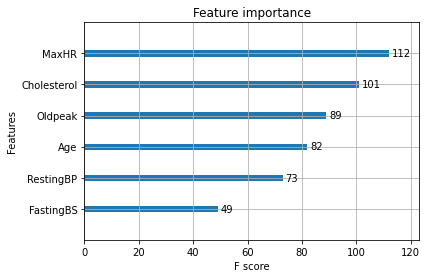

In [ ]:
from xgboost import plot_importance
plot_importance(xgb1)
plt.show()

#FastingBS feature is of least importance

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gdbt = GradientBoostingClassifier(n_estimators = 100, random_state=1, learning_rate=.2)
gdbt.fit(X_train,y_train)
y_pred7 = gdbt.predict(X_test)
evaluating_model(y_test,y_pred7)

Accuracy score:  0.7771739130434783
Confusion matrix:  [[59 18]
 [23 84]]
Precision_score:  0.8235294117647058
Recall score:  0.7850467289719626


Choosing XGBoost as our best model and saving file

In [ ]:
import joblib 
joblib.dump(xgb1, 'model.pkl') 
model = joblib.load('model.pkl' ) 
model.predict(X_test)

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1])